In [1]:
import os, shutil

In [2]:
# The path to the original directory
original_dataset_dir = 'C:\\Users\\tiwari\\Desktop\\Hard drive\\Desktop\\Machine Learning\\Deep learning with python book\\Datasets\\dogs-vs-cats\\original_data'

# The directory where we'll store our smaller datasets
base_dir = 'C:\\Users\\tiwari\\Desktop\\Hard drive\\Desktop\\Machine Learning\\Deep learning with python book\\Datasets\\dogs-vs-cats\\original_data\\cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('totoal training cat images:', len(os.listdir(train_cats_dir)))

totoal training cat images: 1000


In [4]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [5]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [6]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [7]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [9]:
# Building the network
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    # Target directory containing images
                                                    train_dir,
                                                    # All images will be resized to (150,150)
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    # Since we are using binary_crossentropy loss, we need binary labels
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (20, 150, 150, 3)
labels batch shape (20,)


In [14]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 32s 316ms/step - loss: 0.6899 - acc: 0.5320 - val_loss: 0.6673 - val_acc: 0.6080
Epoch 2/30
100/100 [==============================] - 30s 305ms/step - loss: 0.6619 - acc: 0.6095 - val_loss: 0.6788 - val_acc: 0.5580
Epoch 3/30
100/100 [==============================] - 30s 304ms/step - loss: 0.6199 - acc: 0.6595 - val_loss: 0.6881 - val_acc: 0.5800
Epoch 4/30
100/100 [==============================] - 31s 306ms/step - loss: 0.5800 - acc: 0.6985 - val_loss: 0.5888 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 30s 297ms/step - loss: 0.5419 - acc: 0.7275 - val_loss: 0.5698 - val_acc: 0.7060
Epoch 6/30
100/100 [==============================] - 29s 292ms/step - loss: 0.5076 - acc: 0.7565 - val_loss: 0.5616 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 30s 295ms/step - loss: 0.4764 - acc: 0.7790 - val_loss: 0.5477 - val_acc: 0.7270
Epoch 8/30
100/100 [==============================] - 3

In [15]:
model.save('cats_and_dogs_small_1.h5')

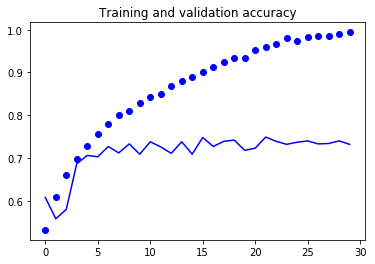

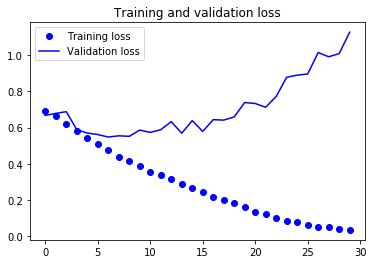

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

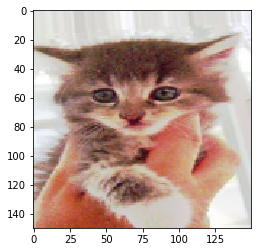

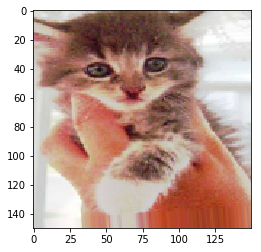

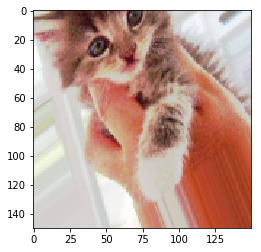

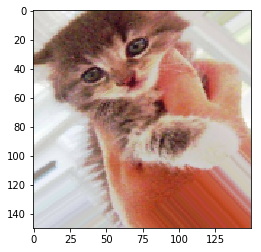

In [18]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to 'augment'
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150,150))

# Convert it to a Numpy array with shape(150,150,3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,)+x.shape)

# The .flow() command below generaters batches of randomly transformed images
# IT will loop indefinitely, so we need to 'break' the loop at some point
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # Target directory
    train_dir,
    # All images will be resized to 150X150
    target_size=(150,150),
    # batch size
    batch_size=32,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 51s 510ms/step - loss: 0.6964 - acc: 0.5297 - val_loss: 0.6783 - val_acc: 0.5171
Epoch 2/100
100/100 [==============================] - 50s 496ms/step - loss: 0.6686 - acc: 0.5894 - val_loss: 0.6489 - val_acc: 0.6186
Epoch 3/100
100/100 [==============================] - 51s 507ms/step - loss: 0.6413 - acc: 0.6281 - val_loss: 0.6130 - val_acc: 0.6523
Epoch 4/100
100/100 [==============================] - 52s 520ms/step - loss: 0.6318 - acc: 0.6394 - val_loss: 0.5939 - val_acc: 0.6823
Epoch 5/100
100/100 [==============================] - 51s 509ms/step - loss: 0.6083 - acc: 0.6709 - val_loss: 0.5861 - val_acc: 0.6783
Epoch 6/100
100/100 [==============================] - 49s 488ms/step - loss: 0.6049 - acc: 0.6647 - val_loss: 0.5647 - val_acc: 0.7081
Epoch 7/100
100/100 [==============================] - 50s 495ms/step - loss: 0.5889 - acc: 0.6759 -

100/100 [==============================] - 49s 492ms/step - loss: 0.4243 - acc: 0.7972 - val_loss: 0.4705 - val_acc: 0.7843
Epoch 61/100
100/100 [==============================] - 49s 491ms/step - loss: 0.4267 - acc: 0.7981 - val_loss: 0.5046 - val_acc: 0.7584
Epoch 62/100
100/100 [==============================] - 50s 501ms/step - loss: 0.4217 - acc: 0.8022 - val_loss: 0.4979 - val_acc: 0.7614
Epoch 63/100
100/100 [==============================] - 49s 489ms/step - loss: 0.4259 - acc: 0.8006 - val_loss: 0.5124 - val_acc: 0.7590
Epoch 64/100
100/100 [==============================] - 50s 498ms/step - loss: 0.4202 - acc: 0.8084 - val_loss: 0.4648 - val_acc: 0.7719
Epoch 65/100
100/100 [==============================] - 50s 501ms/step - loss: 0.4186 - acc: 0.8106 - val_loss: 0.5484 - val_acc: 0.7500
Epoch 66/100
100/100 [==============================] - 51s 507ms/step - loss: 0.4103 - acc: 0.8134 - val_loss: 0.5238 - val_acc: 0.7719
Epoch 67/100
100/100 [==============================] 

In [21]:
model.save('cats_and_dogs_small_2.h5')

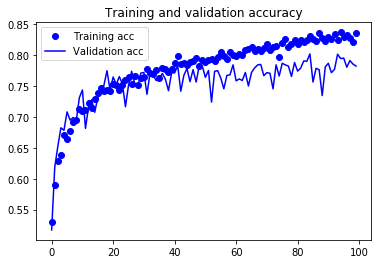

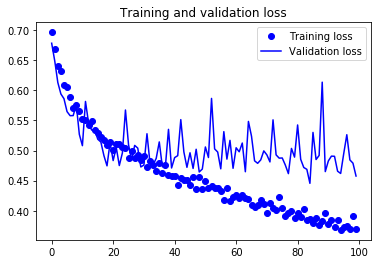

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()